<a href="https://colab.research.google.com/github/rakib06/AI/blob/master/Machine_Learning_Foundations_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ep -1. What is ML?

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([1, 2, 3, 4, 5, 6, 10])
ys =np.array([100000, 150000, 200000, 250000, 300000, 350000, 550000])
model.fit(xs, ys, epochs=1000)
print(model.predict([7.0]))

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 92862111744.0000
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 18329769984.0000
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 3911703296.0000
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 1119343488.0000
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 575356928.0000
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 466232096.0000
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 441249504.0000
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 432581472.0000
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 427110624.0000
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 422299584.0000
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 417656928.0000
Epoch 12/1000
1/1 [================

# Ep -2. First steps in computer vision

In [ ]:
# The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:
mnist  = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0

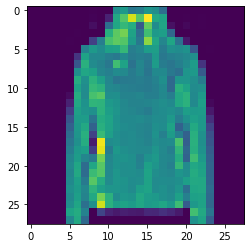

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[-10])

In [ ]:
print(training_labels[-10])

4


In [ ]:
print(training_images[-10])

[[  0   0   0   0   0   0   0   0   1   0   0 127 138 102 109 134 126  92
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0  24 154 187 239 188 255 154 148
    0   0   1   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   9   0  92 151 170 158  70 194 124 150
   11   0   5   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0 160 191 202 147  93 177 137 143
   85   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0  48 109 181 192 187 141 102 212 151 117
  150  96  17   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 113 138 124 145 147 170 109 116 141 143 107
  128 124 130  66   0   1   0   0   0   0]
 [  0   0   0   0   0   0  39 148 119 119 109 103 121 106 110 106 137 102
  110 114 119 126   0   0   0   0   0   0]
 [  0   0   0   0   0   0  70 162 123 114 102 177 147  97 117 102 141 107
  100 110 123 141  38   0   0   0   0   0]
 [  0   0   0   0   0   0 127 151 145 117 111 123 120 106 116  9

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [ ]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them.

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

defining model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5004 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3794 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3393 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3152 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2974 - accuracy: 0.8908


But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8686


[0.3578071594238281, 0.8686000108718872]

## Exploration Exercise

### Exercise 1:





In [ ]:
classifications = model.predict(test_images)
print(classifications[24])


[8.0039415e-09 9.9999988e-01 1.0005409e-09 1.4386193e-07 8.6553276e-10
 2.6556207e-12 1.6445301e-09 2.8519382e-14 2.3875959e-11 1.6819337e-13]


In [ ]:
max_probability = max(classifications[24])

In [ ]:
max_probability

0.9999999

In [ ]:
test_image_index = -15
max_index = list(classifications[test_image_index]).index(max(classifications[test_image_index]))
print(max_index)
print(test_labels[test_image_index])
print(classifications[test_image_index])

2
2
[2.8935909e-01 3.1872448e-02 4.9965435e-01 5.6796178e-02 2.6190264e-02
 1.9788048e-04 5.9604108e-02 2.2816588e-04 3.5943542e-02 1.5396910e-04]


### Exercise 2: dense layer

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4709 - accuracy: 0.8332
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3593 - accuracy: 0.8684
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3187 - accuracy: 0.8823
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.8901
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2781 - accuracy: 0.8968


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
model.fit(training_images, training_labels, epochs=30, callbacks=[callbacks])
model.evaluate(test_images, test_labels)

In [ ]:
classifications = model.predict(test_images)
test_image_index = -1
max_index = list(classifications[test_image_index]).index(max(classifications[test_image_index]))
print(max_index, '==> ', max(classifications[test_image_index])*100 , '%')
print(test_labels[test_image_index])
print(classifications[test_image_index])

5 ==>  99.99990463256836 %
5
[1.53657016e-08 2.41049526e-15 2.13084980e-10 2.19168759e-13
 4.66907268e-09 9.99999046e-01 1.13332746e-10 4.65074123e-07
 5.15206636e-07 3.61583152e-10]


# Ep-3: Convolutions and pooling


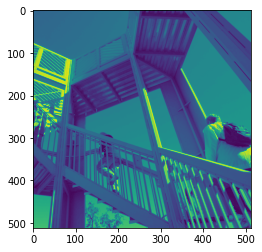

In [2]:
from scipy import misc
i = misc.ascent()
import matplotlib.pyplot as plt

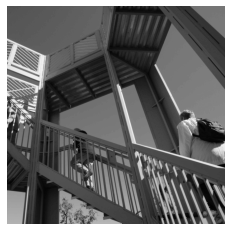

In [6]:
plt.axis('off')
plt.gray()
plt.grid(False)
plt.imshow(i)
plt.show()

In [8]:
import numpy as np

i_transformed = np.copy(i)
i_transformed

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [9]:
size_x = i_transformed.shape[0]
size_x

512

In [12]:
size_y = i_transformed.shape[1]
size_y

512

In [13]:
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
weight  = 1

In [46]:

# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
weight  = 10

for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution
# Plot the image. Note the size of the axes -- they are 512 by 512
#plt.gray()
'''
plt.grid(False)
plt.imshow(i)
plt.show() 
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()  
'''
# to test
'''
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(i_transformed)
axarr[1].imshow(i)
plt.show()
'''  

'\nf, axarr = plt.subplots(1,2) \naxarr[0].imshow(i_transformed)\naxarr[1].imshow(i)\nplt.show()\n'

## Pooling
As well as using convolutions, pooling helps us greatly in detecting features. The goal is to reduce the overall amount of information in an image, while maintaining the features that are detected as present.

In [36]:
new_x = int(size_x/2)
new_y = int(size_y)
newImage = np.zeros((new_x, new_y))

In [37]:
newImage

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<function matplotlib.pyplot.show>

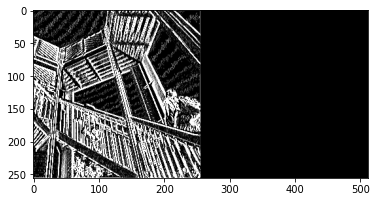

In [47]:
new_x = int(size_x/2)
new_y = int(size_y)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2), int(y/2)] = pixels[0]
f, axarr = plt.subplots(1,1) 
plt.imshow(newImage)
plt.show